# Projeto integrado 1
---
Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso vai permitir que você identifique possíveis sucessos e planeje campanhas publicitárias.

### Etapa 1. Abertura e leitura do arquivo de dados e estudando as informações gerais
___

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

sns.set_palette('rainbow')
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 2.5})
# sns.set_context('talk')
# Define o contexto, fonte e largura das linhas nos gráficos como 2.5

In [2]:
df = pd.read_csv("games.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Problemas encontrados até o momento: 
* Colunas não seguem o padrão snake_case 
* Algumas colunas estão com tipos de dados incorretos. colunas: year_of_release, user_score 
* Algumas colunas com dados ausentes. colunas: name, year_of_release, genre, critic_score, user_score, rating 
* Coluna user_score que teoricamente teria que ser uma coluna quantitativa tem valor string chamado TBD (to be determined)

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
print(df.describe())

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000  


In [6]:
print(df.describe(include='O'))

                               Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990


### Etapa 2. Preparação dos dados
___

In [7]:
# Substituindo os nomes das colunas para snake case
new_col_names = []

for old_name in df.columns:
    name_stripped = old_name.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(" ", "_")
    new_col_names.append(name_no_spaces)

df.columns = new_col_names

df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Verificando proporção de valores ausentes
df.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [9]:
# Analisando e lidando com os valores ausentes nas colunas categoricas
# name, genre, rating

df = df.dropna(subset=["name", "genre", "year_of_release"]
               ).reset_index(drop=True)

Porcentagem de ausentes baixa nas colunas name, genre e year of release. Por conta disso optei por deletar as linhas

In [10]:
# verificando se há um padrão na ausencia de valores da coluna rating
print(df[df["rating"].isna()].sample(10))

df["rating"] = df["rating"].fillna("unknown")

                                           name platform  year_of_release  \
10521              Idol Janshi Suchie-Pai Remix      SAT           1995.0   
15877         Total War Attila: Tyrants & Kings       PC           2016.0   
9553                   Colony Wars III: Red Sun       PS           2000.0   
12946          Hercules: The Legendary Journeys      N64           2000.0   
7024                                    Reactor     2600           1981.0   
5791                 Nounai Aeshe: IQ Suppli DS       DS           2006.0   
6024                   The King of Fighters '95      SAT           1995.0   
13781               Magical Starsign (JP sales)       DS           2006.0   
16021                          Toro to Morimori      PS3           2009.0   
4637   Boku no Natsuyasumi 2: Umi no Bouken Hen      PS2           2002.0   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
10521          Misc      0.00      0.00      0.10         0.00          

Não foi encontrado nenhum padrão em relação a ausencia de valores na coluna rating, por se tratar de ausencia, aleátoria, coluna categórica e proporção alta de ausentes. Valores preenchidos com unknown.

In [11]:
# Analisando e lidando com os valores ausentes nas colunas numericas
# user_score

# Filtrando para poder obter max, min, media e mediana e verificar outliers
df_filtered = df[(df["user_score"] != "tbd") & (~df["user_score"].isna())]

df_filtered["user_score"] = df_filtered["user_score"].astype("float")

print("Max:", df_filtered["user_score"].max())
print("Min:", df_filtered["user_score"].min())
print("Média:", df_filtered["user_score"].mean())
print("Mediana:", df_filtered["user_score"].median())

# verificando se há um padrão na ausencia de valores da coluna user_score
print(df[df["user_score"].isna()].sample(10))

# Substituir "tbd" por valores ausentes NaN
df["user_score"] = df["user_score"].replace("tbd", np.nan)

# Converter "user_score" para numérico
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

Max: 9.7
Min: 0.0
Média: 7.126329894144447
Mediana: 7.5
                                                    name platform  \
13172                                    Black & Bruised       GC   
9394   Jissen Pachi-Slot Hisshouhou! Aladdin II Evolu...      PS2   
4976                   Dancing with the Stars: We Dance!      Wii   
14317                            Lethal Enforcers I & II       PS   
14727  Mahou Sensei Negima! Private Lesson 2: Ojama S...      GBA   
16422                                  PGA European Tour      N64   
3315                          New Play Control! Pikmin 2      Wii   
10506  Kiku! Kaku! Kotoba o Fuyasu! Hajimete no Eigo ...       DS   
12537                                Senritsu no Stratus      PSP   
7646                                       Kan Colle Kai      PSV   

       year_of_release         genre  na_sales  eu_sales  jp_sales  \
13172           2003.0      Fighting      0.04      0.01      0.00   
9394            2005.0          Misc      0.

Coluna user_score além de muitos dados ausentes também havia um valor abreviado chamado "tbd" que significa to be determined.  Nenhum padrão desse valor em comparacao com outras colunas foi encontrado. Ausentes preenchidos 

In [12]:
# critic_score
print("Max:", df["critic_score"].max())
print("Min:", df["critic_score"].min())
print("Média:", df["critic_score"].mean())
print("Mediana:", df["critic_score"].median())

# verificando se há um padrão na ausencia de valores da coluna critic_score
print(df[df["critic_score"].isna()].sample(10))

Max: 98.0
Min: 13.0
Média: 68.99436302142053
Mediana: 71.0
                                                name platform  \
6761                          Dragon Ball: XenoVerse     X360   
12949                            Blues Brothers 2000      N64   
5417                   Pitfall 3D: Beyond the Jungle       PS   
12884                    Pet Pals: New Leash on Life       DS   
13376                                  Chicken Shoot      GBA   
4270                  PES 2009: Pro Evolution Soccer      Wii   
9130                      Interactive Sampler Disc 6       PS   
949                                 Sonic & Knuckles      GEN   
13265                  Wayne Gretzky's 3D Hockey '98       PS   
13400  Twilight Syndrome: Kinjiratera Toshi Densetsu       DS   

       year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
6761            2015.0    Fighting      0.17      0.04      0.00         0.02   
12949           2000.0    Platform      0.04      0.01      0.0

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB
None


### Explicação sobre o tratamento de valores ausentes 
---

* Porcentagem de ausentes nas 3 ultimas colunas de score e rating estavam altas

* Linhas das colunas name e genre excluidas pois se tratava somente de duas linhas com valores ausentes, sem grande impacto 

* Coluna rating preenchida com valor unknown, pois se tratavam de muitas linhas que poderiam impactar na analise, a principio nao foi encontrado nenhum padrão de ausencia em comparação com outras colunas, como se trata de uma coluna categórica, preenchi com "unknown"

* Linhas com ausentes da coluna year of release foram excluidas pois se tratava de uma porcentagem muito baixa 1%, sem grande impacto

* Ausentes das colunas user_score e critic_score permancem como ausentes pois a porcentagem é alta, como se trata uma coluna numérica uma alteração indevida pode distorcer a distribuição dos dados. 

* Nenhum padrão foi encontrado nas ausencias e na abreviação tbd

__motivos de ausencia__
* Valores ausentes nas colunas de ratings e scores podem estar ausente simplesmente porque os usuários se esqueceram de responder ou nao quiseram

__obs__
tbd foi substituide por NaN, coluna convertido para numérico

In [14]:
# Convertendo os dados para os tipos corretos.

# Converter para datetime com apenas o ano
# format='%Y': Especifica que os valores contêm apenas o ano (não há meses ou dias).
# errors='coerce' ignora os valores que nao pode ser convertidos como os ausentes
df["year_of_release"] = pd.to_datetime(
    df["year_of_release"], format='%Y', errors='coerce')

# manter apenas o ano em formato numéric
df["year_of_release"] = df["year_of_release"].dt.year

df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

* coluna year_of_release alterada para int, pois não faz sentido anos como numero decimal 
* coluna user_score alterada para float, pois se trata de um rating com escala numérica

### Duplicados

In [15]:
# verificando linhas duplicadas
df.duplicated().sum()

0

In [16]:
# Calculando o total de vendas (a soma das vendas em todas as regiões) para cada jogo
df["total_sales"] = df["na_sales"] + \
    df["eu_sales"] + df["jp_sales"] + df["other_sales"]

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Etapa 3. Analise dos dados

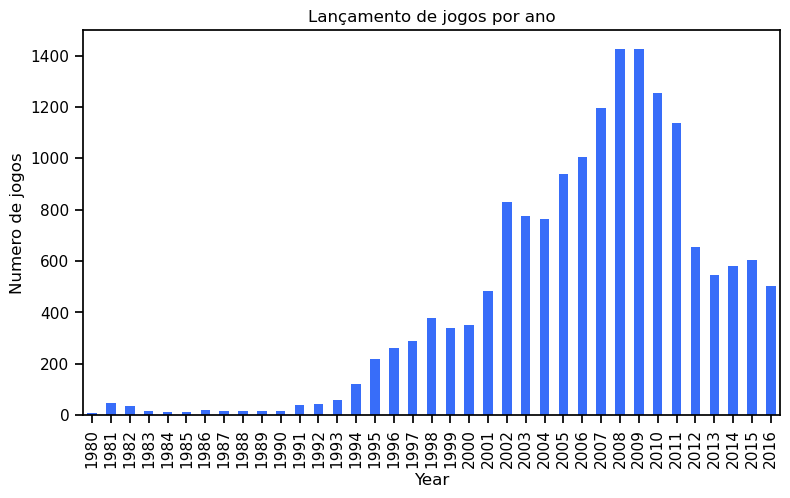

In [17]:
# Quantos jogos foram lançados em anos diferentes

grouped_by_name = df.groupby("year_of_release")["name"].size()

grouped_by_name.plot(x="year_of_release", kind="bar", title="Lançamento de jogos por ano",
                     xlabel="Year", ylabel="Numero de jogos", figsize=[9, 5])

plt.show()

A partir dos anos 2000 há um aumento no numero de lançamento de jogos, alcançando seu pico nos anos de 2008 e 2009 (por volta de 1400 jogos), de 2012 em diante o numero cai e permanece por volta dos 600 jogos 

In [18]:
# identificando as 10 plataformas com maiores vendas totais
top_platforms = df.groupby("platform")["total_sales"].sum().nlargest(10)

# filtro main df
df_top_platforms = df[df["platform"].isin(top_platforms.index)]

# Agregação dos dados por ano e plataforma
df_yearly_sales = df_top_platforms.groupby(["year_of_release", "platform"])[
    "total_sales"].sum().unstack()
print(df_yearly_sales.head())

platform         3DS    DS  GBA      PS  PS2  PS3  PS4  PSP  Wii  X360
year_of_release                                                       
1985             NaN  0.02  NaN     NaN  NaN  NaN  NaN  NaN  NaN   NaN
1994             NaN   NaN  NaN    6.03  NaN  NaN  NaN  NaN  NaN   NaN
1995             NaN   NaN  NaN   35.96  NaN  NaN  NaN  NaN  NaN   NaN
1996             NaN   NaN  NaN   94.70  NaN  NaN  NaN  NaN  NaN   NaN
1997             NaN   NaN  NaN  136.17  NaN  NaN  NaN  NaN  NaN   NaN


Unstack () serve para transformar um DataFrame com um índice de múltiplos níveis, reorganizando os dados e convertendo um dos níveis de índice em colunas.

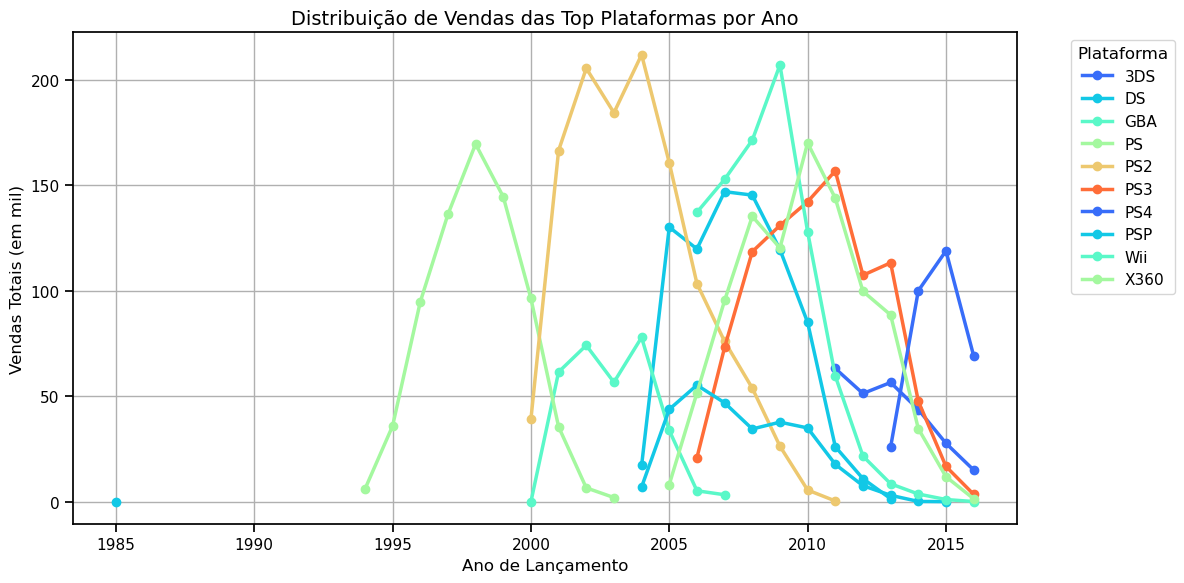

In [ ]:
# Analisando a distribuição das vendas por ano para top plataformas
# Grafico de linha
# Configuração do tamanho e estilo do gráfico
plt.figure(figsize=(12, 6))

# Criar uma linha para cada plataforma (coluna)
for platform in df_yearly_sales.columns:
    plt.plot(
        df_yearly_sales.index,  # anos
        df_yearly_sales[platform],  # vendas da coluna interada
        label=platform,  # label nome da coluna
        marker='o'
    )

# Título e rótulos dos eixos
plt.title("Distribuição de Vendas das Top Plataformas por Ano", fontsize=14)
plt.xlabel("Ano de Lançamento", fontsize=12)
plt.ylabel("Vendas Totais (em mil)", fontsize=12)

# Adicionar legenda
plt.legend(title="Plataforma",
           bbox_to_anchor=(1.05, 1), loc="upper left")

# Grid para facilitar leitura
plt.grid(True)

# Ajustar layout
plt.tight_layout()

plt.show()

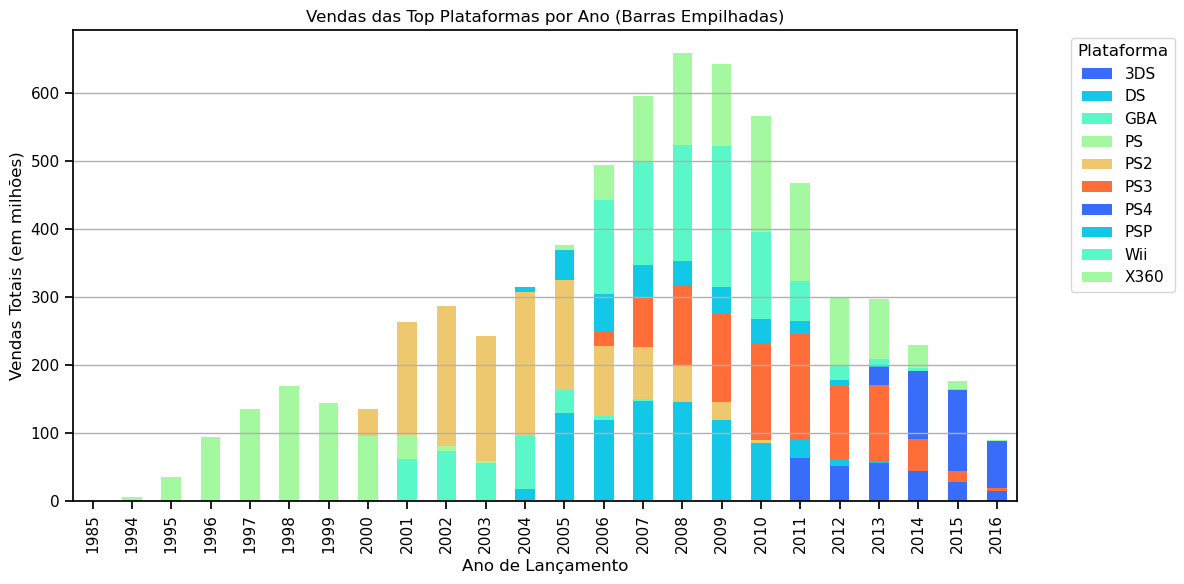

In [20]:
# Criar o gráfico de barras empilhadas
df_yearly_sales.plot(kind="bar", stacked=True,
                     figsize=(12, 6))
plt.title("Vendas das Top Plataformas por Ano (Barras Empilhadas)")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Vendas Totais (em milhões)")
plt.legend(title="Plataforma",
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

As 10 top plataformas de acordo com numero total de vendas foram identificadas, nos dois ultimos gráficos vimos que os números começam a ficar bastante relevantes a partir dos anos 2000

### Identificando plataformas que desapareceram:
- Uma plataforma é considerada "desaparecida" se o último ano em que registrou vendas significativas foi há muitos anos, critério para "desaparecimento": se uma plataforma não teve vendas nos últimos 3 anos

In [21]:
# Último ano com vendas por plataforma
last_sales_year = df_top_platforms.groupby("platform")["year_of_release"].max()

# obtendo o ano mais recente no conjunto de dados
current_year = df["year_of_release"].max()

# Exemplo: desaparecimento em 3 anos
disappeared_platforms = last_sales_year[last_sales_year < (current_year - 3)]
print("Plataformas que desapareceram:", disappeared_platforms)

Plataformas que desapareceram: platform
GBA    2007
PS     2003
PS2    2011
Name: year_of_release, dtype: int32


Determinando o tempo médio de vida das plataformas:

In [22]:
# Primeiro e último ano de vendas por plataforma
# agrupamento por ano e metodo agg usado para computar estatisticas diferentes em df agrupado
platform_lifecycle = df_top_platforms.groupby(
    "platform")["year_of_release"].agg(["min", "max"])
platform_lifecycle["lifetime"] = platform_lifecycle["max"] - \
    platform_lifecycle["min"]

platform_lifecycle = platform_lifecycle.dropna()
platform_lifecycle = platform_lifecycle.astype("int")
print(platform_lifecycle.sort_values(by="lifetime", ascending=False))

           min   max  lifetime
platform                      
DS        1985  2013        28
PS2       2000  2011        11
X360      2005  2016        11
PSP       2004  2015        11
Wii       2006  2016        10
PS3       2006  2016        10
PS        1994  2003         9
GBA       2000  2007         7
3DS       2011  2016         5
PS4       2013  2016         3


agg() correto passar um dicionário com {coluna: function}, mas como estamos trabalhando somente com a coluna year, uma lista com as funções serve

Estimando o tempo médio para novas plataformas surgirem e substituírem antigas:

In [23]:
platform_lifecycle = platform_lifecycle.sort_values(by="min")

# Calcular a diferença na coluna 'min' para saber quanto tempo para novas plataformas aparecerem
platform_lifecycle["min_diff"] = platform_lifecycle["min"].diff()

mean_release = round(platform_lifecycle["min_diff"].mean(), 1)
mean_life_cycle = platform_lifecycle["lifetime"].mean()

print(f"O tempo médio para uma nova plataforma ser lançada são de {
      mean_release} anos")
print(f'O tempo médio de vida de uma plataforma são {mean_life_cycle} anos')

O tempo médio para uma nova plataforma ser lançada são de 3.1 anos
O tempo médio de vida de uma plataforma são 10.5 anos


diff() Calcula a diferença entre o valor atual e o valor da linha anterior na coluna.

Interpretação dos Resultados:

* Plataformas populares: As plataformas com maiores vendas totais provavelmente dominaram as vendas em seus períodos de pico.

* Plataformas desaparecidas: Algumas plataformas que antes eram populares podem ter desaparecido devido à obsolescência tecnológica ou mudanças nas preferências dos consumidores.

* Tempo de vida das plataformas: Plataformas populares podem ter um ciclo de vida de mais ou menos 11 anos antes de serem substituídas.

* Intervalo para novas plataformas aparecerem: Novas plataformas frequentemente surgem a cada 3,5 anos, dependendo do fabricante.


### Com o objetivo de construir um modelo mais sólido para o ano seguinte (2017), os dados a partir daqui serão apenas do ano 2012 em diante com as plataformas mais populares. 
De acordo com a analise anterior e os critérios decididos a ultima plataforma que é campeã de vendas até hoje e desapareceu foi o PS2 em 2011. Além disso, 5 anos de dados anteriores pode ser uma base suficientemente relevante para criar um modelo futuro

In [24]:
df_filtered = df_top_platforms[df_top_platforms["year_of_release"] > 2011]

Quais plataformas estão liderando em vendas e quais estão crescendo ou diminuindo:


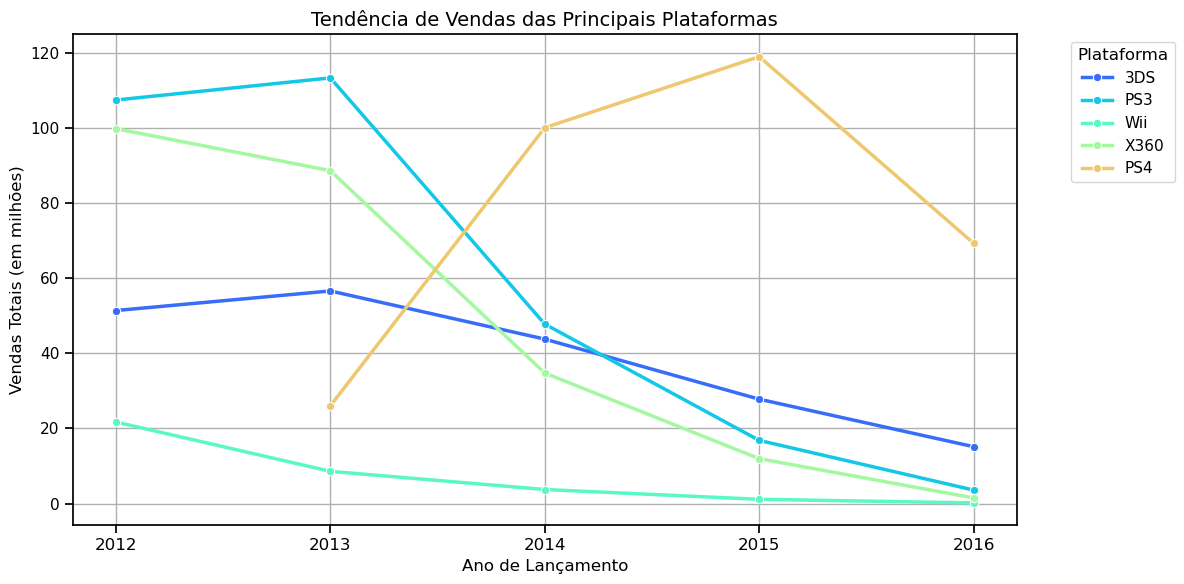

In [25]:
df_aggregated = df_filtered.groupby(["year_of_release", "platform"])[
    "total_sales"].sum().reset_index()

# filtro 5 maiores
top_platforms = (df_filtered.groupby("platform")[
                 "total_sales"].sum().nlargest(5).index)

# novo df com 5 maiores apenas
df_top_platforms = df_aggregated[df_aggregated["platform"].isin(top_platforms)]

# Configurar visualização
plt.figure(figsize=(12, 6))

# Gráfico de linhas para cada plataforma
# Hue representa cada categoria com uma cor diferente no gráfico.
sns.lineplot(
    data=df_top_platforms,
    x="year_of_release",
    y="total_sales",
    hue="platform",
    marker="o"
)

# Título e rótulos
plt.title("Tendência de Vendas das Principais Plataformas", fontsize=14)
plt.xlabel("Ano de Lançamento", fontsize=12)
plt.ylabel("Vendas Totais (em milhões)", fontsize=12)
plt.legend(title="Plataforma",
           bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(ticks=sorted(
    df_top_platforms["year_of_release"].unique()), fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

As plataformas lideres de vendas atualmente são PS4, 3DS e PS3 com, todas estão em declinio exceto a plataforma PS4

Construa um diagrama de caixa para as vendas globais de todos os jogos,
divididos por plataforma. As diferenças nas vendas são significativas? E quanto
às vendas médias em várias plataformas? Descreva suas descobertas.

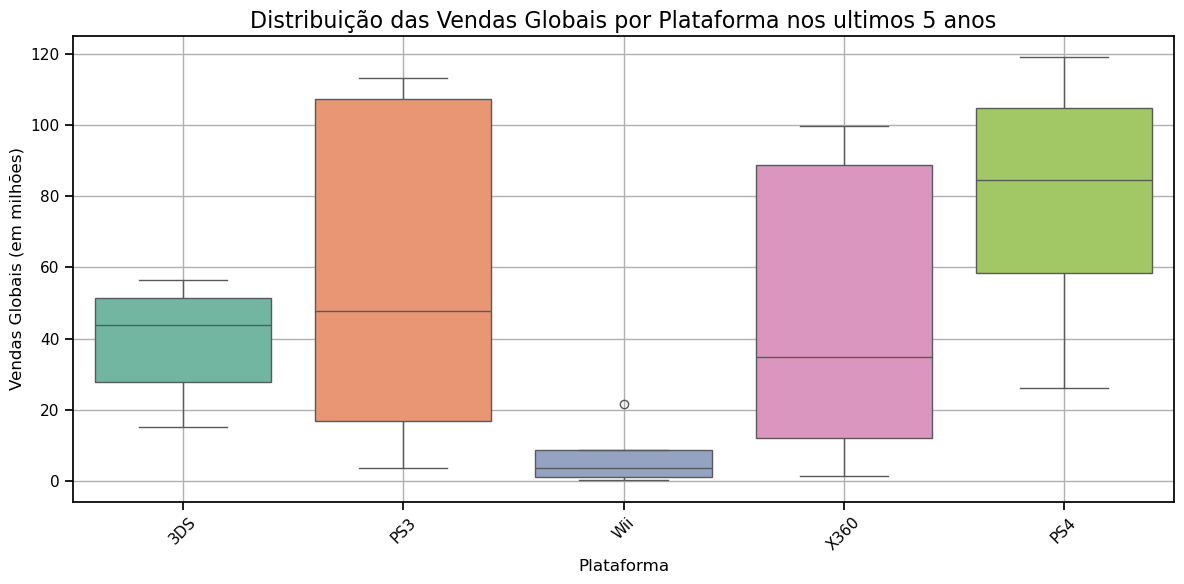

In [26]:
plt.figure(figsize=(12, 6))

# boxplot para cada plataforma
sns.boxplot(
    data=df_top_platforms,
    x="platform",
    y="total_sales",
    palette="Set2"
)

# Título e rótulos
plt.title(
    "Distribuição das Vendas Globais por Plataforma nos ultimos 5 anos", fontsize=16)
plt.xlabel("Plataforma", fontsize=12)
plt.ylabel("Vendas Globais (em milhões)", fontsize=12)
plt.xticks(rotation=45)  # Rotacionar rótulos no eixo X para legibilidade
plt.grid()
plt.tight_layout()
plt.show()

In [27]:
print(df_top_platforms[df_top_platforms["platform"] ==
      "Wii"].sort_values(by="total_sales", ascending=False))

    year_of_release platform  total_sales
4              2012      Wii        21.71
11             2013      Wii         8.59
17             2014      Wii         3.75
23             2015      Wii         1.14
28             2016      Wii         0.18


De acordo com o gráfico de caixa acima, PS3, X360 e PS4 lideram as vendas acumuladas nos ultimos 5 anos. PS4 tem a maior média de vendas, Wii tem a média e numero de vendas baixos, já 3DS, PS3 e X360 médias parecidas. Wii teve um ano destaque em 2012 que é representado por um outlier

Analisando a influencia de revisoes de usuário e criticos nas vendas:

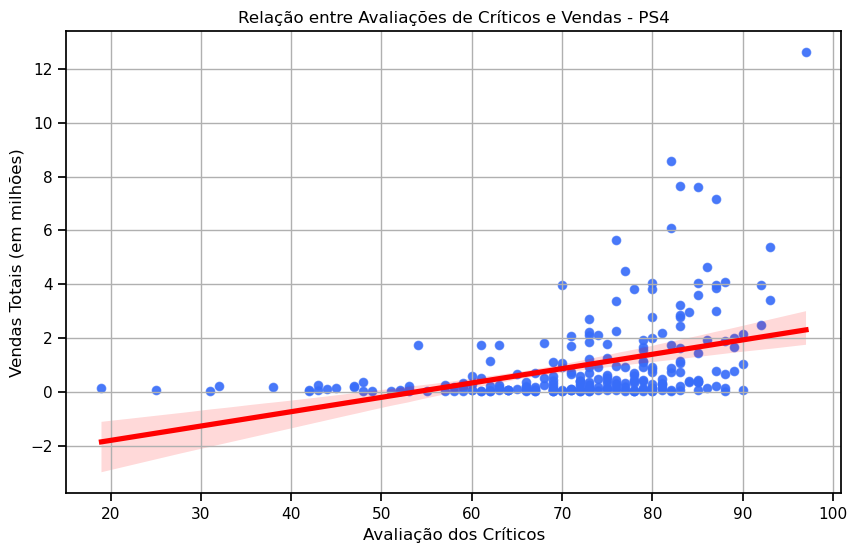

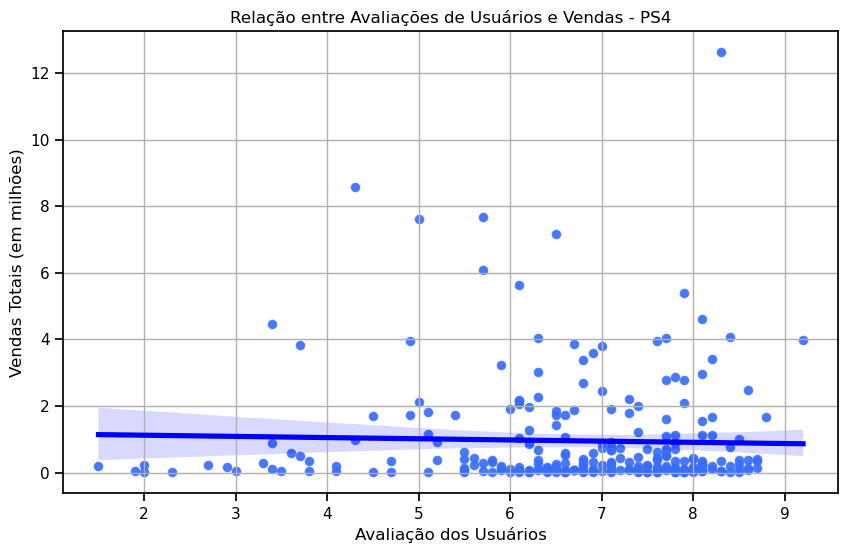

Correlação entre avaliação dos críticos e vendas para PS4: 0.41
Correlação entre avaliação dos usuários e vendas para PS4: -0.03


In [28]:
# Filtrando por plataforma
platform = 'PS4'
df_platform = df_filtered[df_filtered['platform'] == platform]

# Gráfico de dispersão para críticos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_platform, x='critic_score', y='total_sales', alpha=0.7)
sns.regplot(
    data=df_platform,
    x='critic_score',
    y='total_sales',
    scatter_kws={'alpha': 0.7},  # Transparência dos pontos
    line_kws={'color': 'red'}   # Cor da linha de regressão
)
plt.title(f'Relação entre Avaliações de Críticos e Vendas - {platform}')
plt.xlabel('Avaliação dos Críticos')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(True)
plt.show()

# Gráfico de dispersão para usuários
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_platform, x='user_score', y='total_sales', alpha=0.7)
sns.regplot(
    data=df_platform,
    x='user_score',
    y='total_sales',
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'blue'}
)
plt.title(f'Relação entre Avaliações de Usuários e Vendas - {platform}')
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(True)
plt.show()

correlation_critic = df_platform['critic_score'].corr(
    df_platform['total_sales'])
correlation_user = df_platform['user_score'].corr(df_platform['total_sales'])

print(f"Correlação entre avaliação dos críticos e vendas para {
      platform}: {correlation_critic:.2f}")
print(f"Correlação entre avaliação dos usuários e vendas para {
      platform}: {correlation_user:.2f}")

Segundos os gráficos e os coeficientes de correlação, existe uma leve correlação positiva entre as avaliaçãos dos criticos e as vendas dos jogos. Porém a correlação entre avaliações de usuários e as vendas dos jogos é praticamente nula. A unica exceção é a plataforma Wii que é ao contrário onde as avaliacoes dos usuários parece ter uma relevância maior. Alguns exemplos abaixo:
* críticos e vendas para PS4: 0.41, usuários e vendas para PS4: -0.03
* críticos e vendas para X360: 0.36, usuários e vendas para X360: -0.01
* críticos e vendas para Wii: - 0.42, usuários e vendas para Wii: 0.30

Distribuição geral de jogos por gênero:

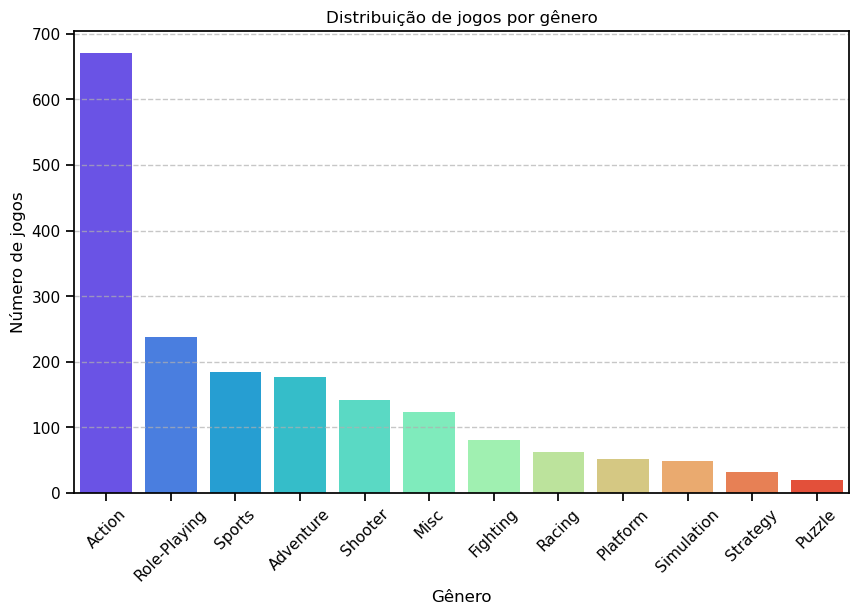

In [29]:
# contagem de jogos por gênero
genre_counts = df_filtered["genre"].value_counts()

# gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="rainbow")
plt.title("Distribuição de jogos por gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de jogos")
plt.xticks(rotation=45)  # 45 graus na legenda abaixo
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

Action é definitivamente o gênero com maior número de jogos com o triplo de jogos em comparação com outros gêneros

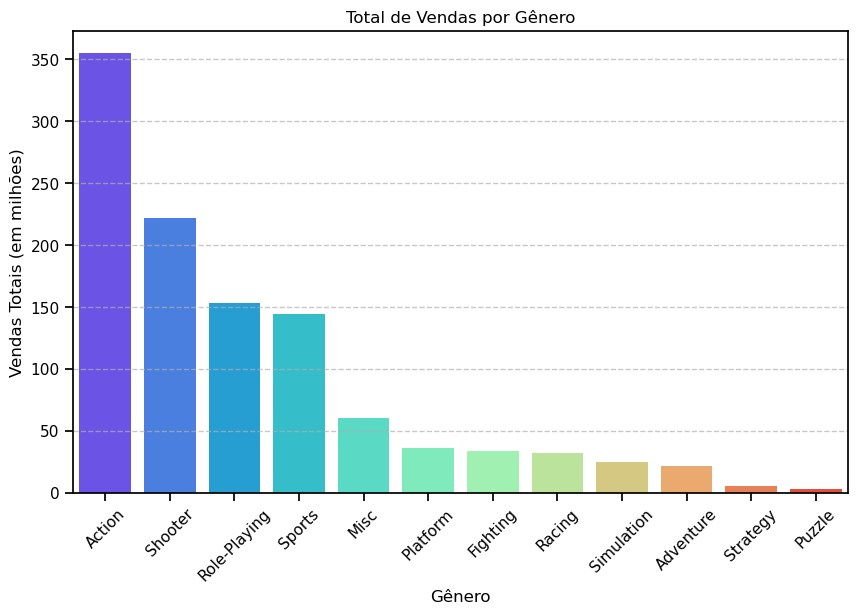

In [30]:
# Vendas por gênero:
# Soma das vendas totais por gênero
genre_sales = df_filtered.groupby(
    'genre')['total_sales'].sum().sort_values(ascending=False)

# Gráfico de barras para vendas
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="rainbow")
plt.title('Total de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nas vendas totais como já esperado Action é o número 1, mas também temos o gênero Shooter, Sports e Role-Playing com números significativos

In [31]:
# Estatísticas descritivas sobre gêneros:

# Média e mediana de vendas por gênero
genre_stats = df_filtered.groupby("genre")["total_sales"].agg(
    ['mean', 'median', 'sum', 'count']).sort_values(by='sum', ascending=False)

print(genre_stats)

                  mean  median     sum  count
genre                                        
Action        0.529463   0.140  355.27    671
Shooter       1.561831   0.500  221.78    142
Role-Playing  0.645630   0.160  153.66    238
Sports        0.786413   0.345  144.70    184
Misc          0.484677   0.115   60.10    124
Platform      0.695000   0.225   36.14     52
Fighting      0.418000   0.155   33.44     80
Racing        0.514286   0.220   32.40     63
Simulation    0.509388   0.130   24.96     49
Adventure     0.124545   0.040   21.92    176
Strategy      0.166875   0.085    5.34     32
Puzzle        0.174000   0.055    3.48     20


Interpretação:

* Gêneros mais populares (número de jogos): Action têm o maior número de lançamentos com o triplo de jogos. 

* Gêneros mais lucrativos (vendas totais): Action, Shooter e Sports são os gêneros mais lucrativos, Shooter e Sports lideram em vendas, mesmo com um número menor de jogos.

* Gêneros menos lucrativos: Strategy e Puzzle são os gêneros menos lucrativos. Possivelmete por se tratar de um público alvo mais nichado.


Gêneros com alta popularidade nem sempre são os mais lucrativos o que é o caso do action com o triplo de lançamentos mais numero de vendas não tão distante de Sports e Shooter, indicando que qualidade ou apelo de mercado pode ser mais importante que quantidade.
Gêneros como Shooter e Sports têm vendas altas, um ponto positivo seria o publico alvo mais amplo e o constante investimento em franquias de sucesso.
Gêneros como Puzzle ou Simulation tendem a ter vendas mais baixas, mas podem se destacar em público alvo e plataformas específicas em dispositivos móveis como celular.

### Etapa 4. Perfil de usuário por região

In [57]:
# vendas totais por plataforma em cada região e vendo quais são as principais:
platform_sales = df_filtered.groupby(
    "platform")[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Calculando a quota de mercado(market share) para cada região
platform_sales["total_sales"] = platform_sales.sum(
    axis=1)  # axis 1 soma toda a linha
platform_sales["na_market_share"] = round(
    platform_sales["na_sales"] / platform_sales["total_sales"] * 100, 1)
platform_sales["eu_market_share"] = round(
    platform_sales["eu_sales"] / platform_sales["total_sales"] * 100, 1)
platform_sales["jp_market_share"] = round(
    platform_sales["jp_sales"] / platform_sales["total_sales"] * 100, 1)

# Calculando desvio padrão de vendas por região
platform_sales["std"] = round(platform_sales[[
    "na_sales", "eu_sales", "jp_sales"]].std(axis=1), 2)

# Cinco principais plataformas com base nas vendas totais
top_platforms = platform_sales.sort_values(
    by="total_sales", ascending=False).head(5)
print(top_platforms)

          na_sales  eu_sales  jp_sales  total_sales  na_market_share  \
platform                                                               
PS4         108.74    141.09     15.96       265.79             40.9   
PS3         103.38    106.86     35.29       245.53             42.1   
X360        140.05     74.52      1.57       216.14             64.8   
3DS          55.31     42.64     87.79       185.74             29.8   
Wii          17.45     11.92      3.39        32.76             53.3   

          eu_market_share  jp_market_share    std  
platform                                           
PS4                  53.1              6.0  64.95  
PS3                  43.5             14.4  40.35  
X360                 34.5              0.7  69.27  
3DS                  23.0             47.3  23.29  
Wii                  36.4             10.3   7.08  


<function matplotlib.pyplot.show(close=None, block=None)>

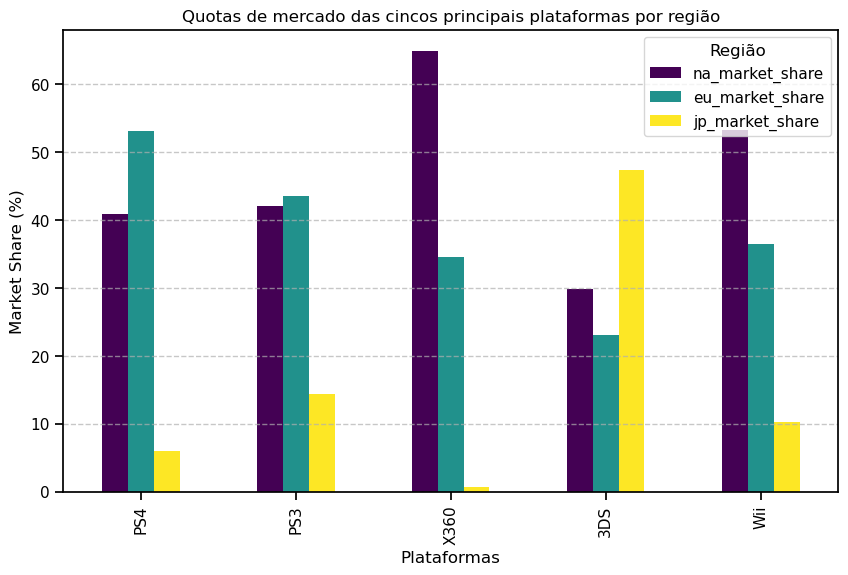

In [33]:
# Plotando variações das quotas de mercado

top_platforms[['na_market_share', 'eu_market_share', 'jp_market_share']].plot(
    kind='bar', figsize=(10, 6), colormap="viridis"
)
plt.title("Quotas de mercado das cincos principais plataformas por região")
plt.xlabel("Plataformas")
plt.ylabel("Market Share (%)")
plt.legend(title="Região")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show

Interpretação:

* NA: Xbox domina, mas playstation também tem boa participação
* EU: Playstation domina mas com pouca diferença, Xbox também tem participação consideravél
* JP: Nintendo domina com a plataforma 3DS

Identificando os cinco principais gêneros por regiao:

In [34]:
# Calculando as vendas totais por gênero em cada região
# Agrupando por gênero e somando as vendas em cada região

genre_sales = df_filtered.groupby(
    "genre")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Calculando as vendas totais e ordenando por região
genre_sales["total_sales"] = genre_sales.sum(axis=1)
top_genres_na = genre_sales.sort_values(by="na_sales", ascending=False).head(5)
top_genres_eu = genre_sales.sort_values(by="eu_sales", ascending=False).head(5)
top_genres_jp = genre_sales.sort_values(by="jp_sales", ascending=False).head(5)

print("Top 5 Gêneros NA:\n", top_genres_na)
print()
print("Top 5 Gêneros EU:\n", top_genres_eu)
print()
print("Top 5 Gêneros JP:\n", top_genres_jp)

Top 5 Gêneros NA:
               na_sales  eu_sales  jp_sales  total_sales
genre                                                  
Action          139.03    128.24     44.95       312.22
Shooter          99.67     85.07      7.42       192.16
Sports           63.33     55.62      6.68       125.63
Role-Playing     49.01     36.38     56.86       142.25
Misc             26.92     19.38      8.11        54.41

Top 5 Gêneros EU:
               na_sales  eu_sales  jp_sales  total_sales
genre                                                  
Action          139.03    128.24     44.95       312.22
Shooter          99.67     85.07      7.42       192.16
Sports           63.33     55.62      6.68       125.63
Role-Playing     49.01     36.38     56.86       142.25
Misc             26.92     19.38      8.11        54.41

Top 5 Gêneros JP:
               na_sales  eu_sales  jp_sales  total_sales
genre                                                  
Role-Playing     49.01     36.38     56.86   

Visualização dos gêneros:

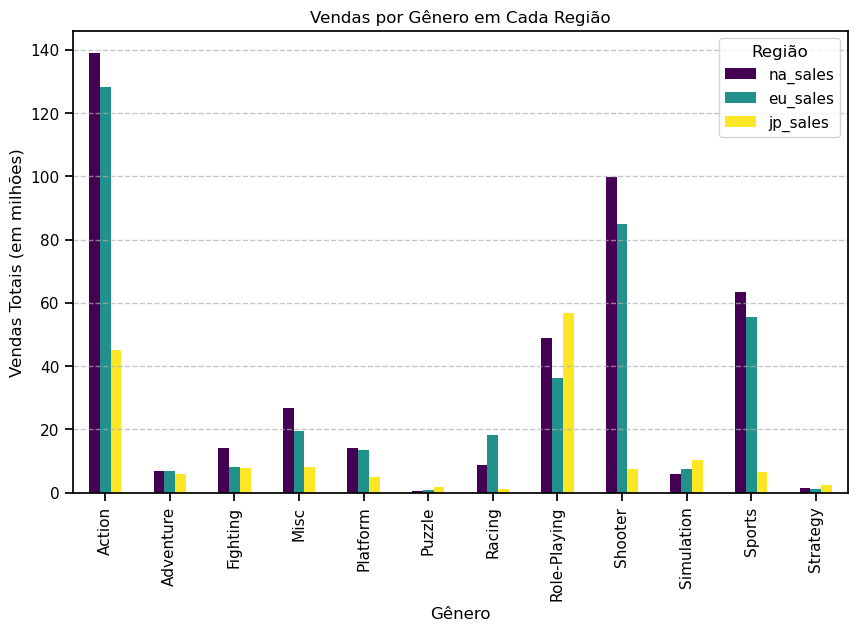

In [35]:
# Comparando gêneros principais em cada região

genre_sales[["na_sales", "eu_sales", "jp_sales"]].plot(
    kind="bar", figsize=(10, 6), colormap="viridis")

plt.title('Vendas por Gênero em Cada Região')
plt.ylabel('Vendas Totais (em milhões)')
plt.xlabel('Gênero')
plt.legend(title='Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Interpretação:

Regiões podem preferir gêneros diferentes.
* NA e EU: Gêneros como Shooter e Sports tendem a liderar juntamente com Action.
* JP: Gênero Role-Playing é bem mais popular e Fighting que não aparecia nas outras regioes aparece nas vendas em JP 

O impacto das classificações ESRB (Rating) nas vendas por região:

In [36]:
# Analise as vendas totais para cada classificação ESRB em cada região:
# Agrupando por classificação ESRB e somando as vendas por regiao
rating_sales = df_filtered.groupby(
    "rating")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Calculando vendas totais por classificação
rating_sales["total_sales"] = rating_sales.sum(axis=1)
rating_sales

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
E,82.62,85.31,21.47,189.40
E10+,53.03,39.08,5.12,97.23
M,169.19,148.83,18.77,336.79
T,46.01,36.77,19.74,102.52
unknown,78.80,70.99,93.09,242.88


Visualização do impacto do rating:

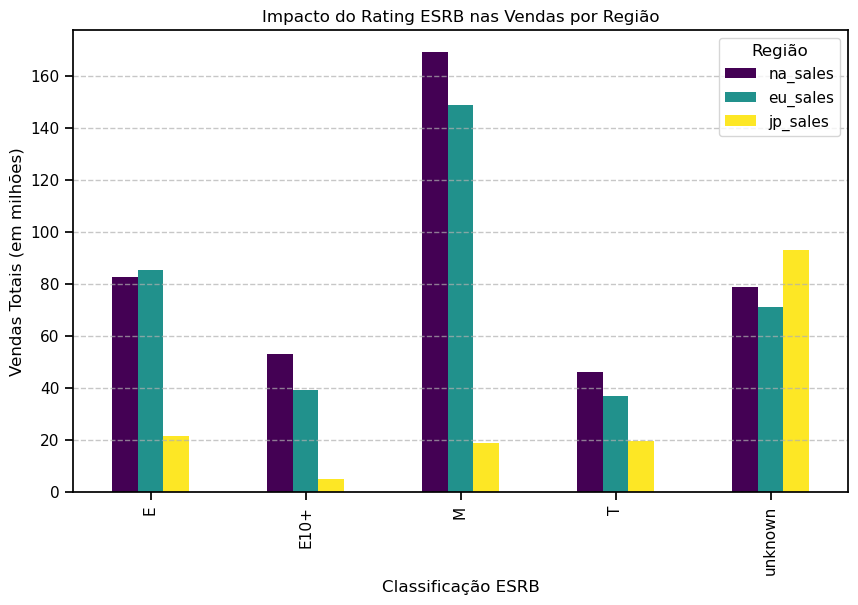

In [37]:
# Plotando vendas por classificação ESRB
rating_sales[["na_sales", "eu_sales", "jp_sales"]].plot(
    kind="bar", figsize=(10, 6), colormap="viridis")

plt.title('Impacto do Rating ESRB nas Vendas por Região')
plt.ylabel('Vendas Totais (em milhões)')
plt.xlabel('Classificação ESRB')
plt.legend(title='Região')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Obs: Correlação e scatter plot não é possivel, pois não se tratam de duas variavéis numéricas, 

Interpretação:

Ratings como E (Everyone), M (Mature) geralmente têm vendas altas em NA e EU, pois abrangem um público amplo.
No Japão, os ratings podem ter menor impacto, já que outros fatores (como gêneros ou franquias) desempenham maior papel.
    

Insights:

Plataformas:
Certas plataformas dominam diferentes mercados devido a preferências regionais.
Exemplo: Xbox é mais forte em NA, enquanto Nintendo lidera no Japão e Playstation na Europa

Gêneros:
Gêneros como Shooter e Sports dominam no Ocidente (NA e EU).
Gêneros como Role-Playing e Fighting tem maior relevância no Japão.

Classificação ESRB:
As classificações mais acessíveis (E e M) são consistentemente lucrativas em NA e EU.
No Japão, a classificação parece ter menos impacto direto nas vendas, com foco em público-alvo específico.

### Etapa 5. Teste de hipóteses:

Teste se classificações médias dos usuários das plataformas Xbox One e PC são as mesmas:

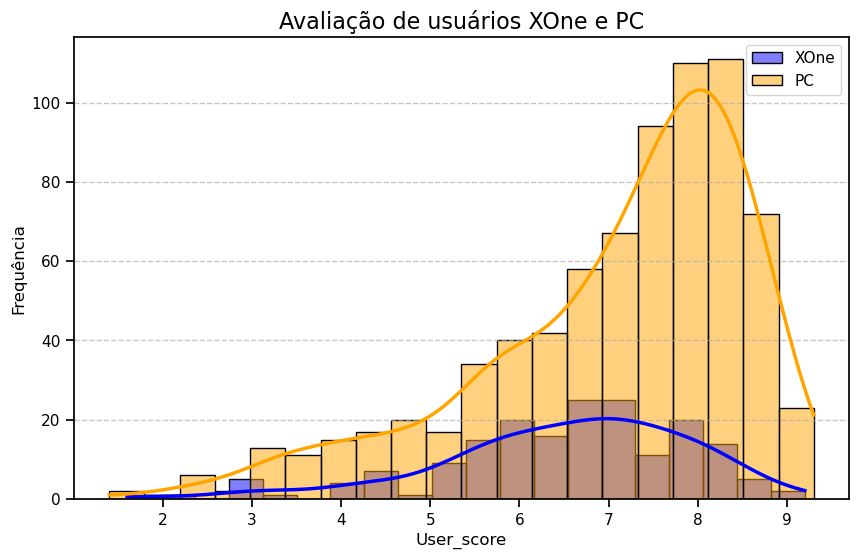

Skew xone:  -0.8581587166672457
Skew pc:  -1.117539274151174


In [38]:
# filtro
df_test_xone = df[(df["platform"] == "XOne") & (pd.notna(df["user_score"]))]
df_test_pc = df[(df["platform"] == "PC") & (pd.notna(df["user_score"]))]

# plotando histograma
plt.figure(figsize=(10, 6))

# hist 1
sns.histplot(df_test_xone, x="user_score", color="blue",
             label="XOne", kde=True, alpha=0.5, bins=20)

# hist 2
sns.histplot(df_test_pc, x="user_score", color="orange",
             label="PC", kde=True, alpha=0.5, bins=20)

# Adicionando rótulos
plt.title('Avaliação de usuários XOne e PC', fontsize=16)
plt.xlabel('User_score', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Skew xone: ", df_test_xone["user_score"].skew())
print("Skew pc: ", df_test_pc["user_score"].skew())

Os histogramas nos mostram que a média para as duas população está entre 7 e 8, as duas distribuicõs tem assimetria para a esquerda, porém a distribuição para XOne está mais proxima de uma distribuição normal com alto desvio padrão comparado a sua média o que produz uma curva mais plana e baixa. Já a distribuição para PC se parece menos com uma distribuição normal, talvez uma distribuição beta, com desvio padrão menor o que gera uma curva mais íngreme proximo da média

In [39]:
# Hipótese nula = A média do user_score são iguais para XOne e PC
# Hipótese alternativa = A média do user_score são diferentes para XOne e PC

print("Variancia xone: ", np.var(df_test_xone["user_score"]))
print("Variancia pc: ", np.var(df_test_pc["user_score"]))

alpha = .05

results = st.ttest_ind(
    df_test_xone["user_score"], df_test_pc["user_score"], equal_var=False)

print('valor-p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Variancia xone:  1.8965188383045533
Variancia pc:  2.3461128196131775
valor-p:  4.5385802963771835e-06
Rejeitamos a hipótese nula


Interpretação:
O valor-p nos diz que considerando que a hipótese nula seja verdadeira a probabilidade é claramente muito baixa para concluir que a média das duas populacões são iguais, ou seja, há uma diferença significativa entre as médias das avaliacoes de usuários entre XOne e PC.

Teste se classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes:

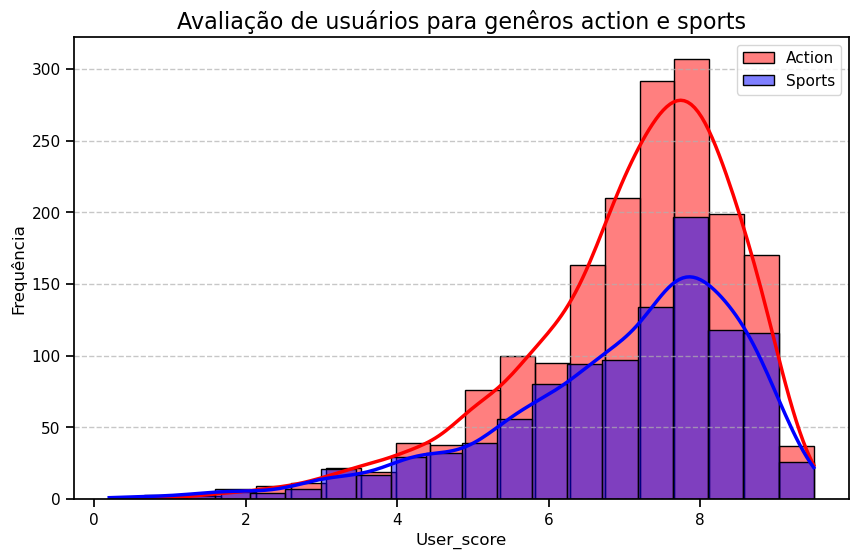

Skew action:  -1.094182111371266
Skew sports:  -1.1157829802445296


In [40]:
# filtro
df_test_action = df[(df["genre"] == "Action") & (pd.notna(df["user_score"]))]
df_test_sport = df[(df["genre"] == "Sports") & (pd.notna(df["user_score"]))]

# plotando histograma
plt.figure(figsize=(10, 6))

# hist 1
sns.histplot(df_test_action, x="user_score", color="red",
             label="Action", kde=True, alpha=0.5, bins=20)

# hist 2
sns.histplot(df_test_sport, x="user_score", color="blue",
             label="Sports", kde=True, alpha=0.5, bins=20)

# Adicionando rótulos
plt.title('Avaliação de usuários para genêros action e sports', fontsize=16)
plt.xlabel('User_score', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Skew action: ", df_test_action["user_score"].skew())
print("Skew sports: ", df_test_sport["user_score"].skew())

As duas distribuicões são parecidas com uma distribuição normal com uma assimetria para a esquerda e média por volta de 8. Action parece ter uma desvio padrão menor que sports, o que gera uma curva mais íngreme perto da média para o mesmo gênero 

In [41]:
# Hipótese nula = A média do user_score são iguais para Action e Sports
# Hipótese alternativa = A média do user_score são diferentes para Action e Sports

print("Variancia action: ", np.var(df_test_action["user_score"]))
print("Variancia sports: ", np.var(df_test_sport["user_score"]))

alpha = .05

results = st.ttest_ind(
    df_test_action["user_score"], df_test_sport["user_score"], equal_var=True)

print('valor-p: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Variancia action:  2.026364874182167
Variancia sports:  2.6206293039045394
valor-p:  0.06480928064420527
Não podemos rejeitar a hipótese nula


Interpretação: O valor-p nos diz que considerando que a hipótese nula seja verdadeira a probabilidade está acima do valor alpha de significância para concluir que a média das duas populacões são iguais, ou seja, não há uma diferença significativa entre as médias das avaliacoes de usuários entre Action e Sports e não podemos rejeitar a hipótese nula


### Etapa 6. Conclusão geral
___

__Análise global:__ 

* A partir dos anos 2000 há um aumento global no numero de lançamento de jogos, o pico de produção aconteceu nos anos de 2008 e 2009 (por volta de 1400 jogos), de 2012 em diante o numero cai e permanece por volta dos 600 jogos ano 

* Plataformas que desapareceram:
GBA    2007
PS     2003
PS2    2011

* Plataformas populares podem ter um ciclo de vida de mais ou menos 11 anos antes de serem substituídas.

* Novas plataformas frequentemente surgem a cada 3,5 anos, dependendo do fabricante.

* PS3, X360 e PS4 lideram as vendas acumuladas nos ultimos 5 anos. Com exceção da plataforma Wii a média de vendas dos ultimos 5 anos são um pouco parecidas entre as plataformas. Wii teve somentew um ano de muito destaque que foi em 2011.

* Existe uma leve correlação positiva entre as avaliaçãos dos criticos e as vendas dos jogos. 

* Action é definitivamente o gênero com maior número de jogos 

* Gêneros mais lucrativos (vendas totais): Action, Shooter e Sports são os gêneros mais lucrativos, Shooter e Sports lideram em vendas, mesmo com um número menor de jogos.

* Gêneros menos lucrativos: Strategy e Puzzle são os gêneros menos lucrativos. Possivelmete por se tratar de um público alvo mais nichado.
___

__Analise regional:__ 

* NA: Xbox domina, mas playstation também tem boa participação
* EU: Playstation domina mas com pouca diferença, Xbox também tem participação consideravél
* JP: Nintendo domina com a plataforma 3DS


Regiões podem preferir gêneros diferentes.
* NA e EU: Gêneros como Shooter e Sports tendem a liderar juntamente com Action.
* JP: Gênero Role-Playing é bem mais popular e Fighting que não aparecia nas outras regioes aparece nas vendas em JP 


Ratings como E (Everyone), M (Mature) geralmente têm vendas altas em NA e EU, pois abrangem um público amplo.
No Japão, os ratings podem ter menor impacto, já que outros fatores (como gêneros ou franquias) podem desempenhar um maior papel.

__Insights:__

Certas plataformas dominam diferentes mercados devido a preferências regionais.

Gêneros:
Gêneros como Shooter e Sports dominam no Ocidente (NA e EU).
Gêneros como Role-Playing e Fighting tem maior relevância no Japão.

Classificação ESRB:
As classificações mais acessíveis (E e M) são consistentemente lucrativas em NA e EU.
No Japão, a classificação parece ter menos impacto direto nas vendas, com foco em público-alvo específico.
    

---

__Teste de hipóteses sobre classificação média de usuários__

* O teste de hipótese ttest_ind foi escolhido pois o objetivo era comparar as médias de duas populações estatísticas diferentes.
Concluimos com esse teste que há uma diferença significativa entre as médias de avaliações de usuários quando se trata de plataformas(XOne e PC), mas quando se trata de genêros a diferença não é tão significativa.
equal_var = True foi definido nesse teste com o objetivo de um teste mais preciso e também foi observado que não havia grande diferença entre a variância das duas populações testadas nos dois testes
